# About Dataset
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. 
* The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. 
* Several constraints were placed on the selection of these instances from a larger database. 
* In particular, all patients here are females at least 21 years old of Pima Indian heritage.
* From the data set in the (.csv) file we can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

# Objective
* The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Variables
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Approach
* We will use the dataset to predict whether a patient has diabetes or not.
* We will use different classification algorithms to predict the outcome.
* We will use different evaluation metrics to evaluate the performance of the models.
* We will use different techniques to handle the missing values and outliers in the dataset.
* We will use different techniques to handle the imbalance in the dataset.
* We will use different techniques to handle the scaling of the dataset.
* We will use different techniques to handle the feature selection in the dataset.

# Evaluation Metrics
* We will use the following evaluation metrics to evaluate the performance of the models:
    * Accuracy
    * Precision
    * Recall
    * F1 Score
    * ROC AUC Score

# Table of Contents
* Step 1: Importing the Relevant Libraries
* Step 2: Data Inspection
* Step 3: Data Cleaning
* Step 4: Exploratory Data Analysis
* Step 5: Data Preprocessing
* Step 6: Model Building
* Step 7: Model Evaluation
* Step 8: Conclusion

# Step 1: Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 2: Data Loading and Preprocessing

In [2]:
url = ("data/diabetes.csv")
data = pd.read_csv(url)

In [3]:
# printing the first 5 rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Getting sum of null values in the dataframe
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Getting statistical information about the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Getting the shape of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Getting the number of rows and columns in the dataframe
data.shape

(768, 9)

In [8]:
# Getting the number of unique values in the dataframe
data.duplicated().sum() 

0

In [9]:
# Let's no of diabetes and non-diabetes cases
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

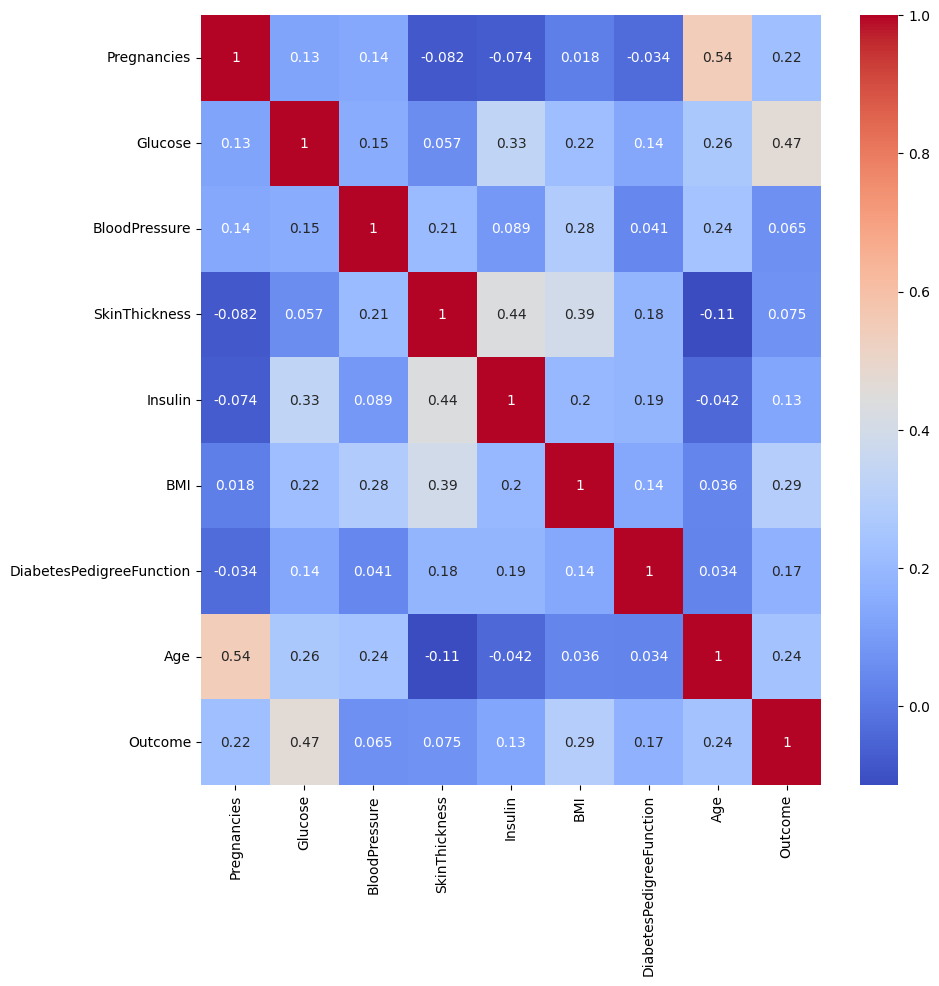

In [10]:
# Let's check the correlation between the features
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Explaining the correlation between the features
* Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.
* A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.
* In this dataset, we will use the correlation matrix to understand the relationship between the features.
* Looking at the correlation matrix, we understand that there is no strong correlation between the target variable and the independent variables.


In [11]:
# Let's check the distribution of the data in the dataframe
def plot_hist(data):
    sns.set()
    plt.figure(figsize=(6,6))
    #Creating Histogram
    sns.histplot(data = data, bins = 10, kde = True, color='red', label = 'Histogram')
    plt.title('Outcome Distribution')
    plt.xlabel('Outcome')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


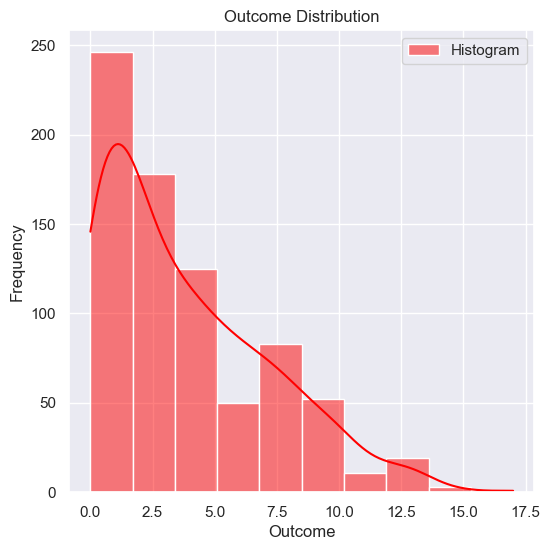

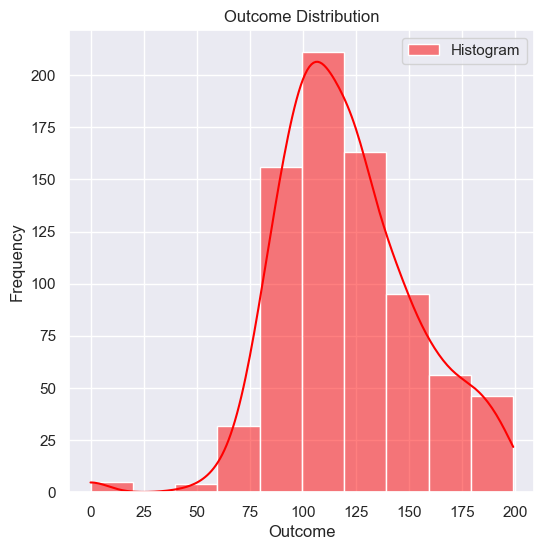

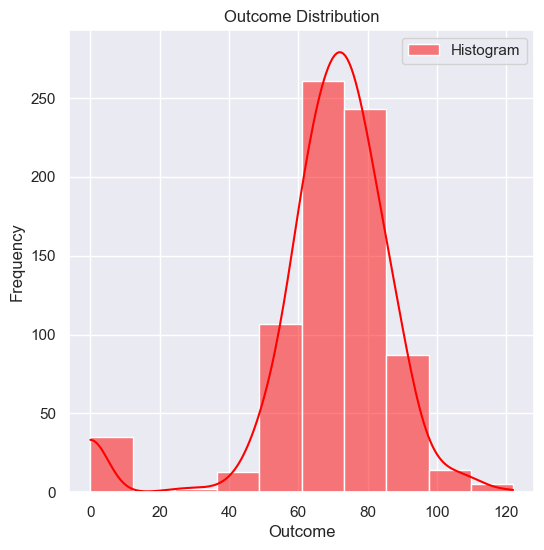

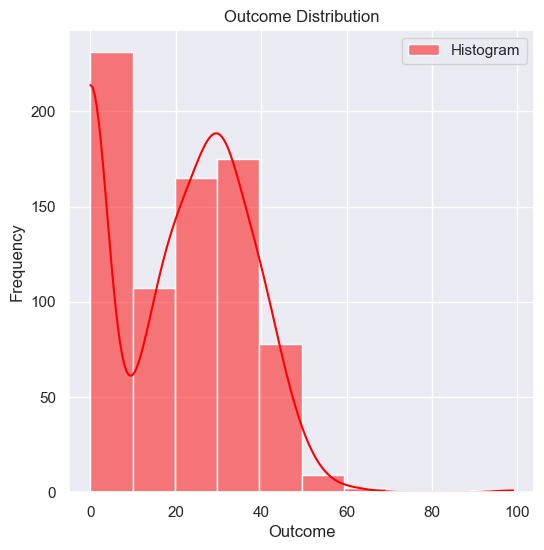

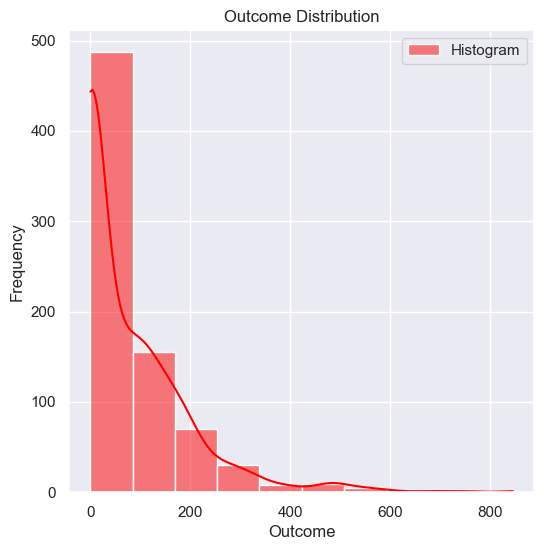

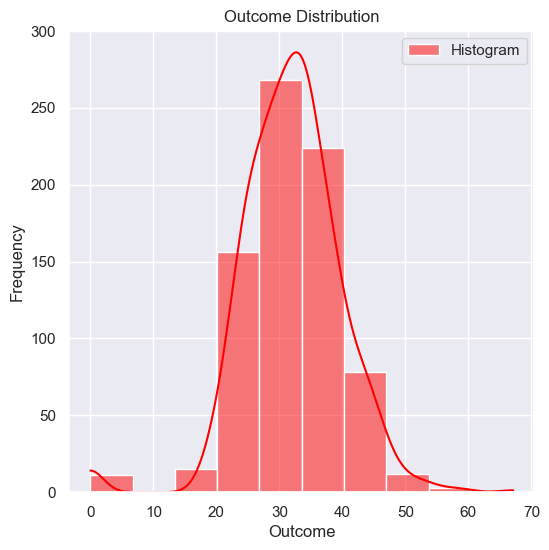

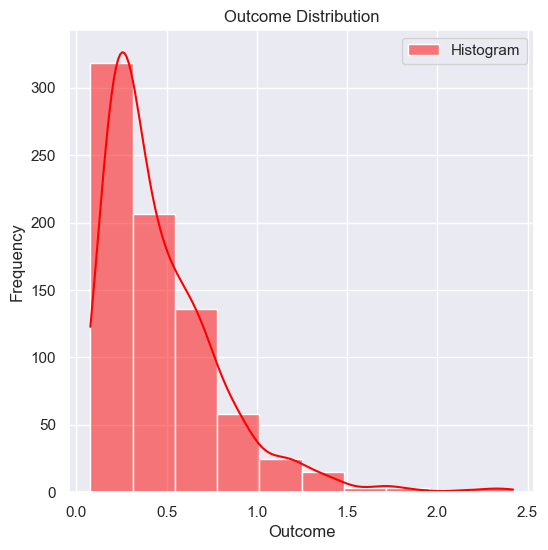

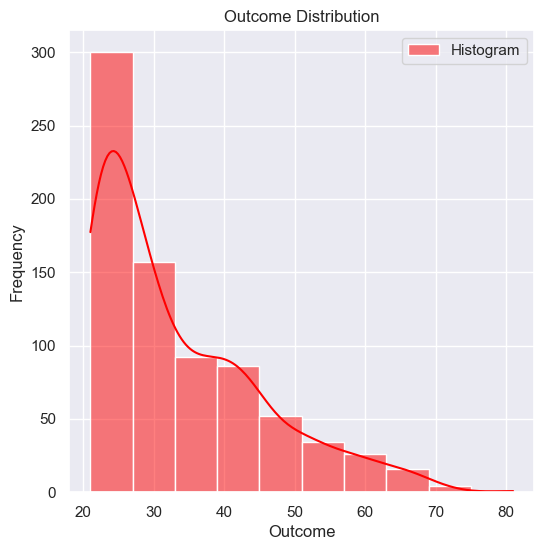

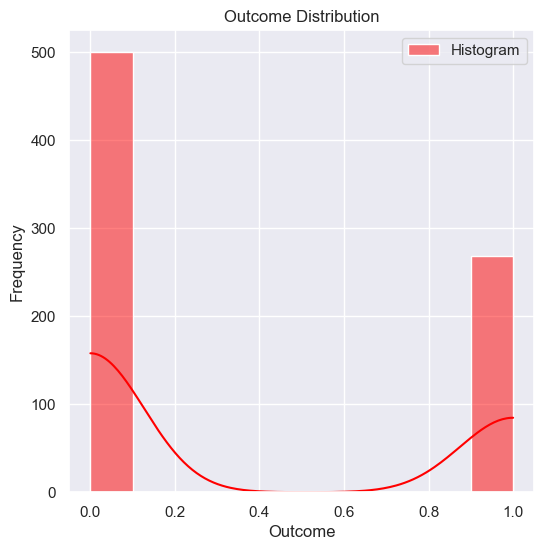

In [12]:
for i in data.columns:
    plot_hist(data[i])

<Axes: >

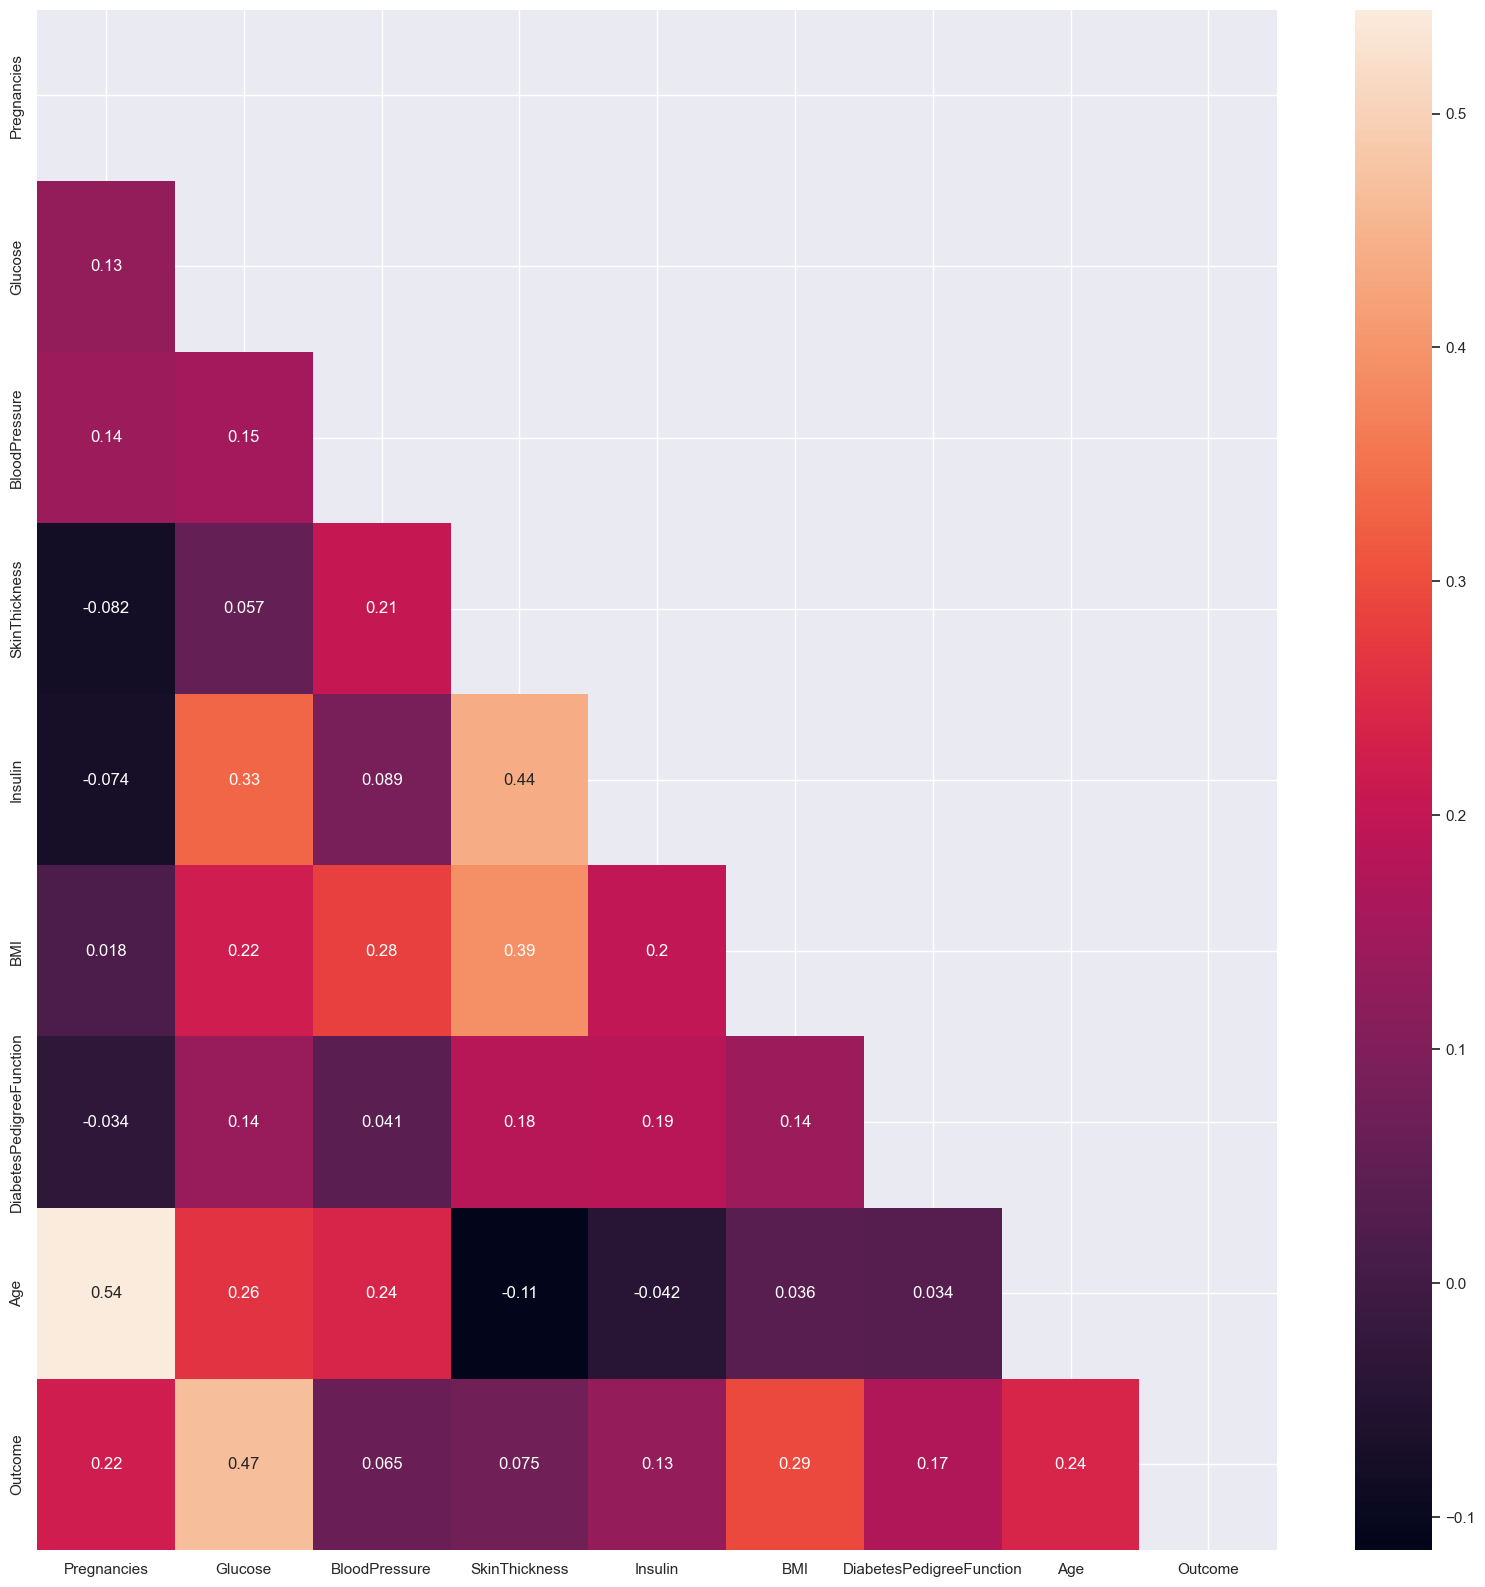

In [13]:
# Let's check the correlation of the data in the dataframe
mask = np.triu(data.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), mask=mask, annot=True)

In [14]:
# Let's check the distribution of the data in the dataframe
def plot_box(data):
    sns.set()
    plt.figure(figsize=(6,6))
    #Creating Boxplot
    sns.boxplot(data = data, color='red')
    plt.title('Boxplot')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

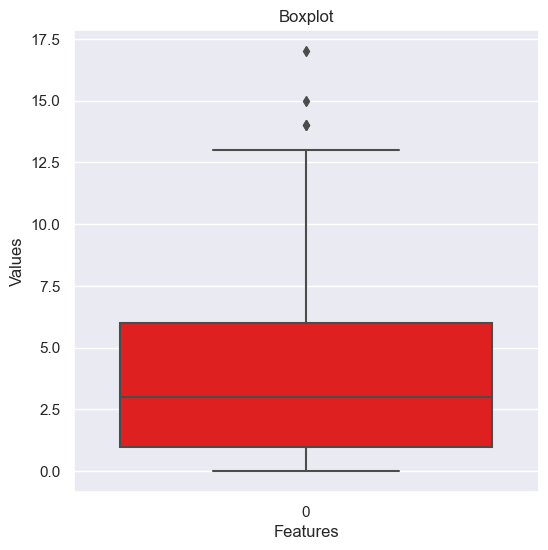

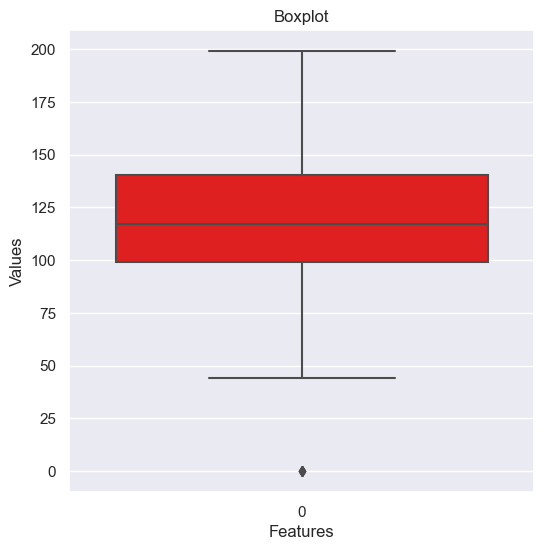

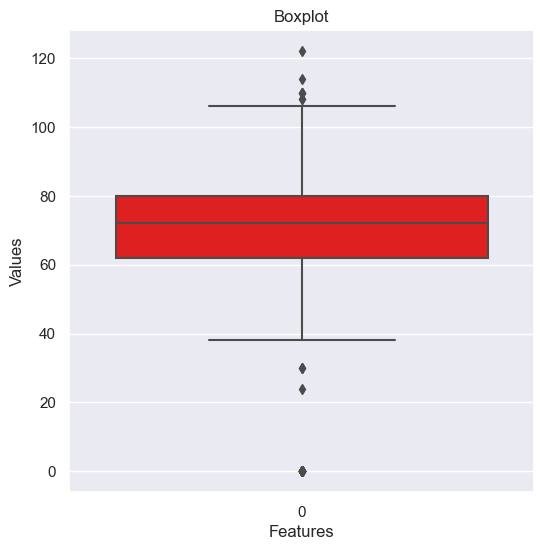

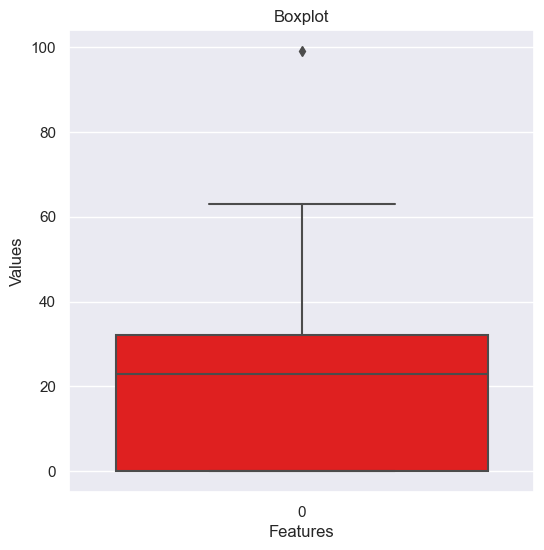

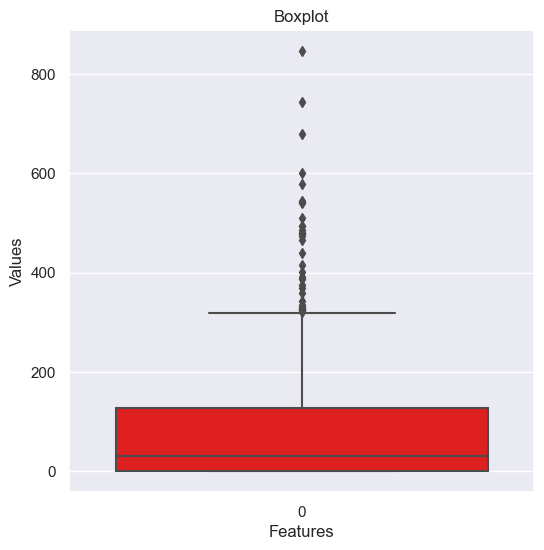

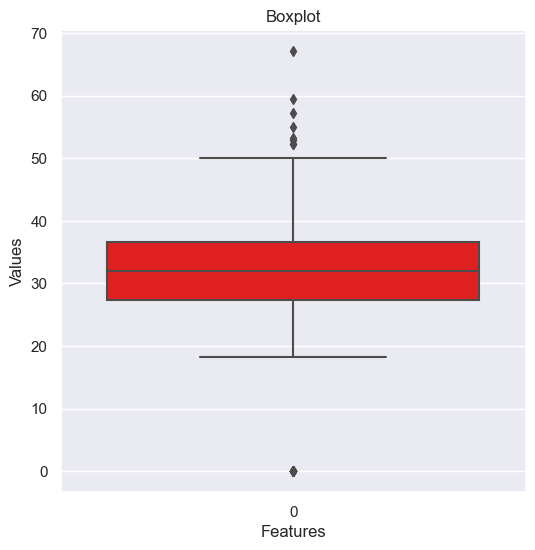

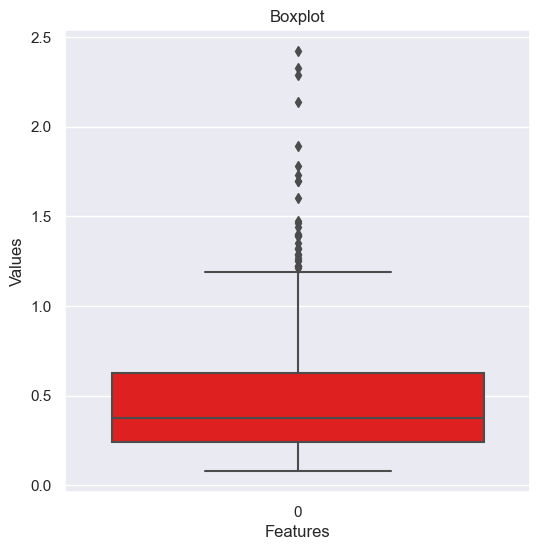

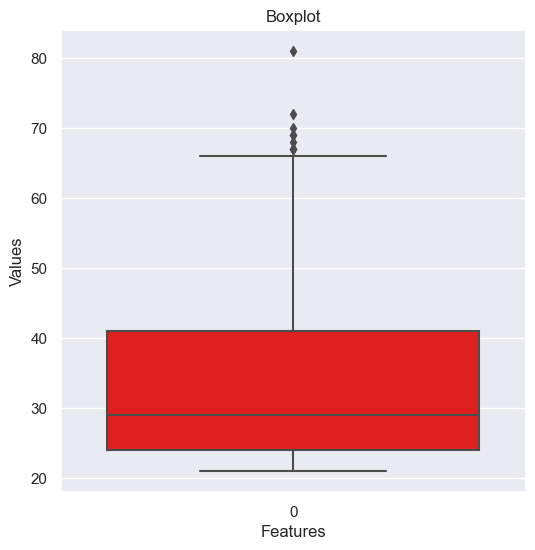

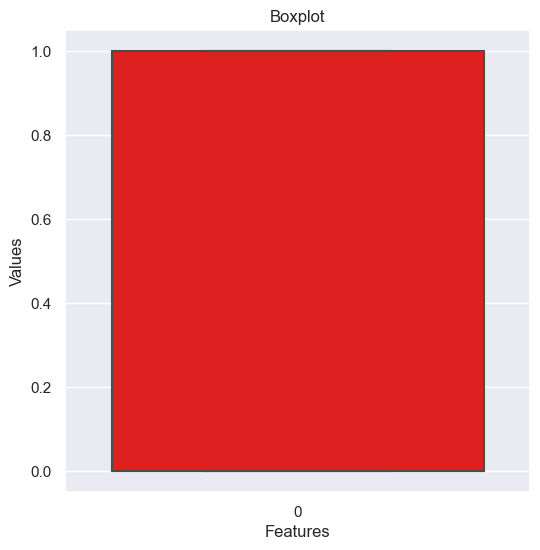

In [15]:
for i in data.columns:
    plot_box(data[i])

In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [84]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
# Let's divide the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [18]:
# Let's scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
# Let's split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Let's train the model
# Let's import all the machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
# Let's make predictions with all the algorithms
models = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier()]
model_names = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier', 'ExtraTreesClassifier']
scores = []

In [22]:
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [23]:
# Let's compare the scores of the models
model_scores = pd.DataFrame({'Model': model_names, 'Scores': scores})
model_scores

,Model,Scores
0,LogisticRegression,0.753247
1,SVC,0.727273
2,RandomForestClassifier,0.740260
3,DecisionTreeClassifier,0.766234
4,KNeighborsClassifier,0.688312
5,GradientBoostingClassifier,0.740260
6,AdaBoostClassifier,0.733766
7,BaggingClassifier,0.681818
8,ExtraTreesClassifier,0.733766


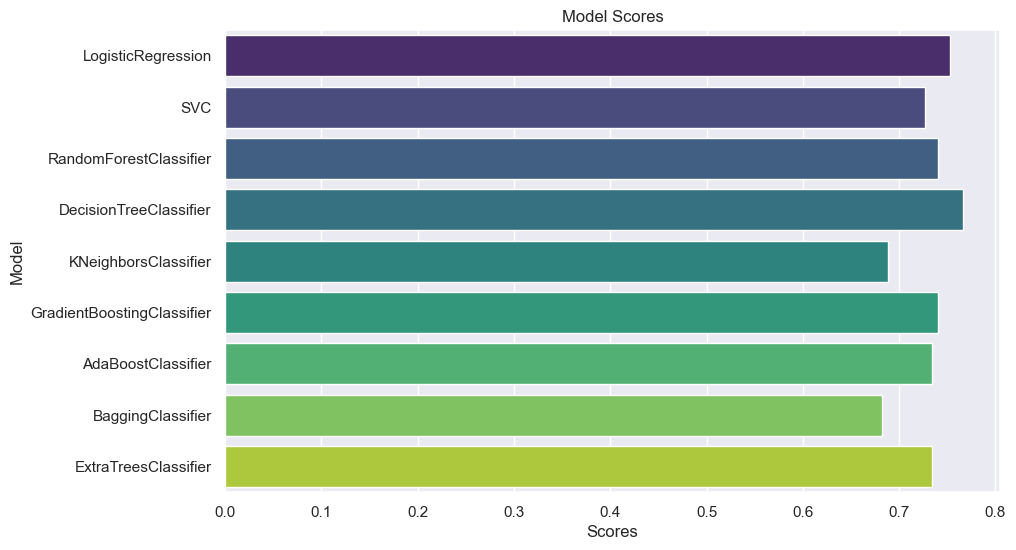

In [24]:
# Let's visualize the scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Model', data=model_scores, palette='viridis')
plt.title('Model Scores')
plt.xlabel('Scores')
plt.ylabel('Model')
plt.show()

In [25]:
# Let's make predictions with the best model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
# Let's evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
[[80 19]
 [21 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

Accuracy Score: 0.7402597402597403


In [27]:
# As we can see, the model has an accuracy of 0.72
# Let's use different hyperparameters to improve the model
from sklearn.model_selection import GridSearchCV
model_names = {'model1': LogisticRegression(), 
               'model2': SVC(), 
              }
param_grid = {'model1': {'C': [0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, 
              'model2': {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto']}
            }

for model in model_names:
    clf = GridSearchCV(model_names[model], param_grid[model], n_jobs=-1)
    clf.fit(X_train, y_train)
    print(f'Best Parameters for {model}: {clf.best_params_}')
    print(f'Best Score for {model}: {clf.best_score_}')

Best Parameters for model1: {'C': 10, 'solver': 'newton-cg'}
Best Score for model1: 0.7655071304811408
Best Parameters for model2: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score for model2: 0.765480474476876


In [28]:
clf.best_params_

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}

In [29]:
model_names = {'model3': RandomForestClassifier(), 
               'model4': DecisionTreeClassifier(), 
               'model5': KNeighborsClassifier()
            }

param_grid = {'model3': {'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2'], 'bootstrap': [True, False]}, 
              'model4': {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}, 
              'model5': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 40, 50], 'p': [1, 2]} 
            }

for model in model_names:
    clf = GridSearchCV(model_names[model], param_grid[model], n_jobs=-1)
    clf.fit(X_train, y_train)
    print(f'Best Parameters for {model}: {clf.best_params_}')
    print(f'Best Score for {model}: {clf.best_score_}')

Best Parameters for model3: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for model3: 0.7948154071704651
Best Parameters for model4: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best Score for model4: 0.7540450486472078
Best Parameters for model5: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
Best Score for model5: 0.7557243769159003


In [34]:
# Let's make predictions with the best model
model = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 40, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
# Let's evaluate the model
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
[[80 19]
 [22 33]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy Score: 0.7337662337662337


In [41]:
# As we can see, the model has an accuracy of 0.75
# As still after using different hyperparameters, the model has an accuracy of 0.75
# Let's normalize the data and check if the accuracy improves
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# Let's split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Let's make predictions with the best model
model = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='log2', max_depth=6, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
# Let's evaluate the model
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
[[82 17]
 [19 36]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

Accuracy Score: 0.7662337662337663


In [81]:
# Still our accuracy has not improved
# Let's use different model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(criterion='friedman_mse', max_features='log2', max_depth=10, random_state=40, n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='log2', n_estimators=200,
                           random_state=40)

In [82]:
# Let's make predictions with the best model
y_pred = model.predict(X_test)

In [83]:
# Let's evaluate the model
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
[[75 24]
 [19 36]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

Accuracy Score: 0.7207792207792207


In [92]:
# Let's try balancing the data
count_class_0, count_class_1 = data['Outcome'].value_counts()

# Divide by class
df_class_0 = data[data['Outcome'] == 0]
df_class_1 = data[data['Outcome'] == 1]

In [94]:
df_class_0.shape

(500, 9)

In [95]:
df_class_1.shape

(268, 9)

In [107]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
data = pd.concat([df_class_0, df_class_1_over], axis=0)

In [108]:
data.shape

(1000, 9)

In [109]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
model = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='log2', max_depth=6, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
[[80 16]
 [17 87]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        96
           1       0.84      0.84      0.84       104

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200

Accuracy Score: 0.835
